In [1]:
import h5py
import numpy as np
import seaborn as sns
from sklearn.metrics import root_mean_squared_error as RMSE
import matplotlib.pyplot as plt

In [2]:
def Read_Results(method, case):
    if case == 1:
        with h5py.File(f"./Results/PLS2_PM25_{method}.h5", "r") as f:
            dat={'timer': f['timer'][:],
                 'ypred': f['ypred'][:],
                 'coef':  f['coef'][:]}
    else: 
        with h5py.File(f"./Results/PLS2_PM25_{method}.h5", "r") as f:
            dat={'ypred': f['ypred'][:],
                 'coef':  f['coef'][:]}
    return dat

In [3]:
SIMPLS  = Read_Results('SIMPLS', 0)
ISIMPLS = Read_Results('ISIMPLS', 1)

print("ypred Error: {:15.7e}".format(RMSE(SIMPLS['ypred'], ISIMPLS['ypred'])))
print("coef Error:  {:15.7e}".format(RMSE(SIMPLS['coef'], ISIMPLS['coef']))) 

ypred Error:   4.9458527e-14
coef Error:    1.4172395e-16


In [4]:
NIPALS  = Read_Results('NIPALS', 0)
OLPLS = Read_Results('OLPLS', 1)

print("ypred Error: {:15.7e}".format(RMSE(NIPALS['ypred'], OLPLS['ypred']))) 
print("coef Error:  {:15.7e}".format(RMSE(NIPALS['coef'], OLPLS['coef'])) ) 

ypred Error:   8.3858000e+00
coef Error:    3.8309303e-03


In [5]:
SVDPLS  = Read_Results('SVDPLS', 0)
ISVDPLS = Read_Results('ISVDPLS', 1)

print("ypred Error: {:15.7e}".format(RMSE(SVDPLS['ypred'], ISVDPLS['ypred'])))
print("coef Error:  {:15.7e}".format(RMSE(SVDPLS['coef'], ISVDPLS['coef']))) 

ypred Error:   1.2760642e+01
coef Error:    4.7883561e-04


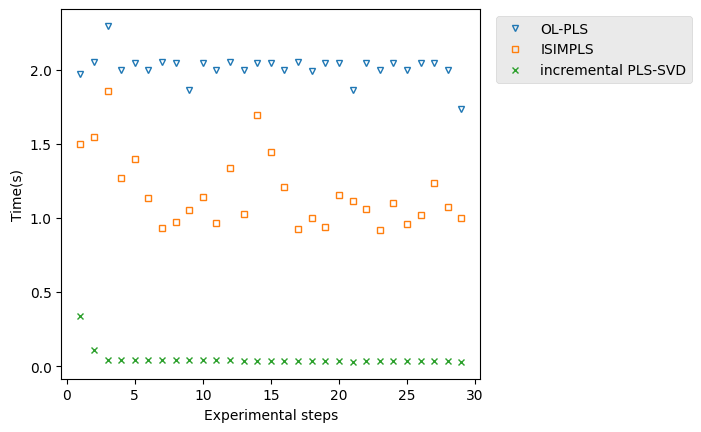

In [6]:
N_steps= len(ISIMPLS['timer'][0])
fig, ax = plt.subplots()
plt.subplots_adjust(right=.65)
plt.style.use('ggplot')
ms = 4 

plt.subplots_adjust(right=.78)

plt.plot(range(1,N_steps+1), OLPLS['timer'][1], 
                label='OL-PLS', ls='', marker='v', markersize=ms, fillstyle='none')
plt.plot(range(1,N_steps+1), ISIMPLS['timer'][1], 
                label='ISIMPLS', ls='', marker='s', markersize=ms, fillstyle='none')
plt.plot(range(1,N_steps+1), ISVDPLS['timer'][1], 
                label='incremental PLS-SVD', ls='', marker='x', markersize=ms, fillstyle='none')


ax.set_xlabel("Experimental steps")
ax.set_ylabel("Time(s)")
ax.legend(bbox_to_anchor=(1.02,1), loc='upper left')
plt.savefig('./fig/TW_PM25.pdf')